# Coursera Capstone Project
## Battle of Neighbourhoods Week 1


### Description & Discussion of the Background

  Bangalore is one of the fast-growing cities in India where over 12 million people live and it has a population density of 4381 people per square kilo meter. As a resident of this city, I decided to use Bangalore in my project. People from different regions of India are thickly populated in Bangalore, especially from northern and southern regions of India. Due to is diversity in culture, the city needs to deal with diverse food items. There are many restaurants in Bangalore, each belonging to different categories like Northern, Southern, Chinese, Andhra, Kerala etc.
  As part of this project, I am analysing the data from Zomato Data set, where we can find the details of different restaurants in Bangalore. Here I am trying to identify the best neighbourhoods for getting the food of our choice. In this project, I am analysing the data based on the availability of Kerala foods, and the best restaurants and areas in Bangalore for getting it. Please note that we can select any category of food here including North, South, or the cuisine of your choice.

### Business Problem:

•	What is best location in Bangalore for Kerala Cuisine

•	Which areas have large number of Kerala Restaurant Market 

•	Which all areas have less number of Restaurant

•	Which is the best place to stay if I prefer Kerala Cuisine

•	What places are have best restaurant in Bangalore


### Interested Audience:

The question of best areas for food choices of interest is applicable to the all the people, especially for the ones who stayed in a different geographical region. With the diversity in culture, Bangalore become a major area where we need to find a solution for this question. Since the it is developed based on the Zomato dataset for Bngalore, the primary targeted audience are the people staying in Bangalore from different regions with different interest in food choices. Though this example is made based on Kerala cuisines, this can be used for the ones who choose different food choice.


### Loading Libraries

In [1]:
import numpy as np 
import time
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 

from pandas.io.json import json_normalize 

import requests 

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

!conda install -c conda-forge folium=0.5.0 --yes 
import matplotlib.pyplot as plt
import folium 
from folium import plugins

import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

from sklearn.cluster import KMeans



print('Imported Libraries')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Imported Libraries


In [ ]:
! pip install geocoder
import geocoder

In [ ]:
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Data Section

For this project we need the following data:
1. Zomato data set that contains the details for restaurants in Bangalore and the ratings.
* Data Source: https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
* Description: This data set contains the required information. And we will use this data set to explore various neighborhoods of Bangalore.

2. Kerala restaurants in Bangalore neighborhood.
* Data Source: Foursquare API
* Description: By using this API we will get all the venues in bangalore. We can filter these venues to get only Kerala restaurants.

### Approach

    Collect the Bangalore Zomato data from https://www.kaggle.com/himanshupoddar/zomato-bangalore-restaurants
    * Using Foursquare API we will get all venues for each neighborhood.
    * Filter out all venues which are Kerala Restaurants.
    * Data Visualization and some statistical analysis.
    * Analysing using Clustering (Specially K-Means):
    1. Find the best value of K
    2. Visualize the neighborhood with number of Kerala Restaurants.
 

### Load Zomato data set downloaded from Zomato

In [125]:
blr_data = pd.read_csv('zomato.csv')

In [202]:
blr_data.head()
print(blr_data.shape)

(43780, 6)


### List the various cuisines available in Zomato dataset for Bangalore

#### Just to start with Data Preprocessing, getting the details of various cuisines available for Bangalore Zomato Data Set

In [203]:
blr_data.cuisines.value_counts()
#blr_data.rest_type.value_counts()

North Indian                                                                            2284
North Indian, Chinese                                                                   2036
South Indian                                                                            1320
Cafe                                                                                     653
Bakery, Desserts                                                                         644
Biryani                                                                                  632
South Indian, North Indian, Chinese                                                      601
Fast Food                                                                                580
Desserts                                                                                 572
Chinese                                                                                  449
Bakery                                                                

### Data Preprocessing

In [128]:
blr_data.drop(columns=['url', 'address','phone','listed_in(city)','dish_liked', 'approx_cost(for two people)','menu_item','listed_in(type)','reviews_list','online_order','book_table'], inplace  =True)


In [129]:
blr_data.dropna(inplace=True)
blr_data.shape

(43780, 6)

In [204]:
#north_data=blr_data[blr_data['cuisines'].str.contains("North Indian")]
north_data=blr_data[blr_data['cuisines'].str.contains("Kerala")]
north_data.shape

(1265, 6)

In [205]:
north_data.columns

Index(['name', 'rate', 'votes', 'location', 'rest_type', 'cuisines'], dtype='object')

In [206]:
north_data.shape

(1265, 6)

In [207]:
north_data.head()

,name,rate,votes,location,rest_type,cuisines
930,Empire Restaurant,3.6/5,113,JP Nagar,"Takeaway, Delivery","Kerala, Seafood, South Indian, Chinese, North ..."
944,Kitchens@JP Nagar,3.9/5,488,JP Nagar,"Takeaway, Delivery","Biryani, Kerala, Mughlai, Street Food, North I..."
972,Kuttanad,3.6/5,140,Bannerghatta Road,Quick Bites,"Kerala, South Indian"
1048,Veruthe Oru Thattukada,3.7/5,27,BTM,Quick Bites,"Kerala, South Indian"
1076,Seasons,3.8/5,500,Bannerghatta Road,Casual Dining,"North Indian, South Indian, Chinese, Seafood, ..."


### Locationwise Restaurant details

Text(0.5, 1.0, 'Locationwise Restaurants')

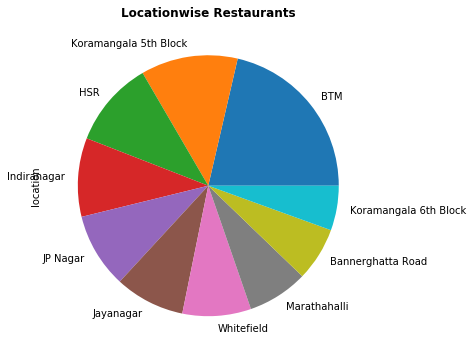

In [208]:
north_data.location.value_counts().head()
plt.figure(figsize=(12,6)) 
blr_data['location'].value_counts()[:10].plot(kind = 'pie')
plt.title('Locationwise Restaurants', weight = 'bold')